# **📌 Extracción(E - Extract)**

## **Importando datos de Telecom X**

In [172]:
import pandas as pd
import json

In [173]:
datos = 'https://drive.google.com/uc?id=1BDg6zUVXK6n-056GLQFfecA6rIM_BzGm'

In [174]:
df = pd.read_json(datos)

# **🔧 Transformación (T - Transform)**

## **Conocer el conjunto de datos**

In [175]:
df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## **Normalizar columnas tipo diccionario**

In [176]:
# Lista de columnas a normalizar
cols_to_normalize = ['customer', 'phone', 'internet', 'account']

In [177]:
# Crear una copia del dataframe original
df_norm = df.copy()

# Normalizar y expandir cada columna JSON en columnas individuales
for col in cols_to_normalize:
    df_norm = pd.concat([df_norm, pd.json_normalize(df_norm[col])], axis=1)
    df_norm.drop(columns=[col], inplace=True)

In [178]:
df_norm.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## **Comprobación de incoherencias en los datos**

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

In [179]:
# Verificar los tipos de datos de 'df_norm'
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [180]:
# Verificar que no existan ID's duplicados
df_norm['customerID'].duplicated().sum()

np.int64(0)

In [181]:
# verificamos si todos los datos de la columna 'SeniorCitizen' son números
pd.to_numeric(df_norm['SeniorCitizen'], errors='coerce').isna().sum()

np.int64(0)

In [182]:
# verificar si todos los datos de la columna 'Charges.Total' son números
pd.to_numeric(df_norm['Charges.Total'], errors='coerce').isna().sum()

np.int64(11)

In [183]:
# mostar los datos que no son números
df_norm[pd.to_numeric(df_norm['Charges.Total'], errors='coerce').isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


## **Manejo de inconsistencias**

In [184]:
# Vamos a converir la columna 'SeniorCitizen' a tipo de dato 'bool'
df_norm['SeniorCitizen'] = df_norm['SeniorCitizen'].astype('bool')

In [185]:
# A los campos vacios de 'Charges.Total' agregar un 0
df_norm['Charges.Total'] = pd.to_numeric(df_norm['Charges.Total'], errors='coerce').fillna(0)

In [186]:
pd.to_numeric(df_norm['Charges.Total'], errors='coerce').isna().sum()

np.int64(0)

In [187]:
# Convertir 'Charges.Total' a tipo de dato float64
df_norm['Charges.Total'] = df_norm['Charges.Total'].astype('float64')

## **Vamos a conservar solo las columnas que**:
- Pueden influir en la decisión de cancelar de los clientes.
- No son redundantes ni irrelevantes para el modelo de análisis.

In [188]:
# eliminamos la columna 'customerID'
df_norm = df_norm.drop(columns=['customerID'])

In [189]:
df_norm.head(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,False,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,False,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,False,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,True,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,True,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## **Columna de cuentas diarias**

Ahora que los datos están limpios, es momento de crear la columna **"Cuentas_Diarias"**. Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

Para crear la columna DailyCharges (Cuentas Diarias), solo necesitamos dividir el valor mensual (Charges.Monthly) entre aproximadamente 30 días. Esto nos da una estimación diaria del gasto del cliente.

In [190]:
# Crear la columna DailyCharges dividiendo el monto mensual por 30
df_norm['DailyCharges'] = df_norm['Charges.Monthly'] / 30

In [191]:
df_norm['DailyCharges'].head(3)

,DailyCharges
0,2.186667
1,1.996667
2,2.463333


## **Estandarización y transformación de datos**

Vamos a convertir las columnas que contienen "Yes" / "No" a valores booleanos tipo entero (1 / 0)

In [192]:
# Lista de columnas a convertir
yes_no_cols = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

In [193]:
# Convertir 'Yes' a 1 y 'No' a 0
for col in yes_no_cols:
    df_norm[col] = df_norm[col].apply(lambda x: 1 if x == 'Yes' else 0).astype('bool')

In [194]:
df_norm.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,DailyCharges
622,False,Male,False,False,False,62,True,True,DSL,True,...,True,True,False,False,Two year,False,Bank transfer (automatic),69.40,4237.50,2.313333
3558,True,Male,False,False,False,11,False,False,DSL,False,...,True,False,True,False,One year,True,Electronic check,41.60,470.60,1.386667
3681,False,Female,False,True,True,50,True,True,DSL,True,...,True,True,False,True,One year,True,Bank transfer (automatic),80.05,4042.20,2.668333
6510,False,Male,False,True,True,63,True,True,No,False,...,False,False,False,False,Two year,False,Mailed check,25.25,1573.05,0.841667
4656,False,Male,True,True,True,72,True,False,Fiber optic,True,...,True,True,True,True,Two year,True,Credit card (automatic),104.10,7447.70,3.470000


## **Traducir datos del dataframe**

In [195]:
cols = df_norm.columns
cols

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'DailyCharges'],
      dtype='object')

In [196]:
# Traducir a espanol los encabezados de las columnas
df_norm.rename(columns={
    'Churn': 'Evasión',
    'gender': 'Género',
    'SeniorCitizen': 'Adulto Mayor',
    'Partner': 'Tiene Pareja',
    'Dependents': 'Dependiente',
    'tenure': 'Permanencia',
    'PhoneService': 'Servicio Telefónico',
    'MultipleLines': 'Líneas Múltiples',
    'InternetService': 'Servicio Internet',
    'OnlineSecurity': 'Seguridad en Línea',
    'OnlineBackup': 'Respaldo en Linea',
    'DeviceProtection': 'Protección Dispositivo',
    'TechSupport': 'Soporte Técnico',
    'StreamingTV': 'Streaming de TV',
    'StreamingMovies': 'Streaming de Películas',
    'Contract': 'Tipo Contrato',
    'PaperlessBilling': 'Facturación Electronica',
    'PaymentMethod': 'Método de Pago',
    'Charges.Monthly': 'Cargo Mensual',
    'Charges.Total': 'Cargo Total',
    'DailyCharges': 'Cargo Diario'
}, inplace=True)


In [197]:
df_norm.columns

Index(['Evasión', 'Género', 'Adulto Mayor', 'Tiene Pareja', 'Dependiente',
       'Permanencia', 'Servicio Telefónico', 'Líneas Múltiples',
       'Servicio Internet', 'Seguridad en Línea', 'Respaldo en Linea',
       'Protección Dispositivo', 'Soporte Técnico', 'Streaming de TV',
       'Streaming de Películas', 'Tipo Contrato', 'Facturación Electronica',
       'Método de Pago', 'Cargo Mensual', 'Cargo Total', 'Cargo Diario'],
      dtype='object')

In [198]:
# Extraer los valores unicos de la columna `Genero`
df_norm['Género'].unique()

array(['Female', 'Male'], dtype=object)

In [199]:
# Cambiar 'Female' por 'Femenino' y 'Male' por 'Masculino'
df_norm['Género'] = df_norm['Género'].replace({'Female': 'Femenino', 'Male': 'Masculino'})

In [200]:
df_norm['Género'].unique()

array(['Femenino', 'Masculino'], dtype=object)

In [201]:
# Extraer los valores unicos de la columna 'TipoContrato'
df_norm['Tipo Contrato'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [202]:
# Traducir los campos de 'TipoContrato'
df_norm['Tipo Contrato'] = df_norm['Tipo Contrato'].replace({'Month-to-month': 'Mes-a-Mes', 'One year': 'Un año', 'Two year': 'Dos años'})

In [203]:
# Extraer los valores unicos de la columna 'MetodoPago'
df_norm['Método de Pago'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [204]:
# Traducir los campos de 'MetodoPago'
df_norm['Método de Pago'] = df_norm['Método de Pago'].replace({
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer (automatic)': 'Transferencia',
    'Credit card (automatic)': 'Tarjeta de crédito'
})

In [205]:
# Extraer los valores unicos de la columna 'ServicioInternet'
df_norm['Servicio Internet'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [206]:
# Traducir los campos de 'ServicioInternet'
df_norm['Servicio Internet'] = df_norm['Servicio Internet'].replace({'Fiber optic': 'Fibra óptica'})

In [207]:
# Generar nuevo archivo CSV del dataframe 'df_norm'
df_norm.to_csv('Datos_TelecomX.csv', index=False)

# **📊 Carga y análisis(L - Load & Analysis)**

## **Análisis Descriptivo**

In [208]:
df_telecom = pd.read_csv('Datos_TelecomX.csv')

In [209]:
df_telecom.head(5)

,Evasión,Género,Adulto Mayor,Tiene Pareja,Dependiente,Permanencia,Servicio Telefónico,Líneas Múltiples,Servicio Internet,Seguridad en Línea,...,Protección Dispositivo,Soporte Técnico,Streaming de TV,Streaming de Películas,Tipo Contrato,Facturación Electronica,Método de Pago,Cargo Mensual,Cargo Total,Cargo Diario
0,False,Femenino,False,True,True,9,True,False,DSL,False,...,False,True,True,False,Un año,True,Cheque por correo,65.6,593.30,2.186667
1,False,Masculino,False,False,False,9,True,True,DSL,False,...,False,False,False,True,Mes-a-Mes,False,Cheque por correo,59.9,542.40,1.996667
2,True,Masculino,False,False,False,4,True,False,Fibra óptica,False,...,True,False,False,False,Mes-a-Mes,True,Cheque electrónico,73.9,280.85,2.463333
3,True,Masculino,True,True,False,13,True,False,Fibra óptica,False,...,True,False,True,True,Mes-a-Mes,True,Cheque electrónico,98.0,1237.85,3.266667
4,True,Femenino,True,True,False,3,True,False,Fibra óptica,False,...,False,True,True,False,Mes-a-Mes,True,Cheque por correo,83.9,267.40,2.796667


In [210]:
df_telecom.describe()

,Permanencia,Cargo Mensual,Cargo Total,Cargo Diario
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157337
std,24.571773,30.129572,2268.648587,1.004319
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.425000,396.200000,1.180833
50%,29.000000,70.300000,1389.200000,2.343333
75%,55.000000,89.875000,3778.525000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


## **Análisis por variable**

### **🔹 Antigüedad en meses:**

- Hay clientes con antigüedad = 0, es decir que podrían estar recién registrados, lo que explicaría valores bajos en facturación.
- La antigüedad promedio (`~32` meses) sugiere que muchos clientes tienen una relación prolongada.
- Distribución posiblemente sesgada hacia los extremos (clientes nuevos y antiguos).

**Sugerencia:** crear grupos de antigüedad (ej. nuevos: `0–12`, leales: `>48`) para analizar la `Evasion`.

### **🔹 Cargo mensual**

- Varía bastante (de `~$18` a `~$118`), probablemente según servicios contratados.
- La mediana es mayor que la media, lo que indica una ligera asimetría hacia la izquierda (clientes con cargos bajos).

💡 Clientes con cargos más altos podrían ser más exigentes → mayor `Evasion`.

### **🔹 Gasto diario estimado**

- Directamente proporcional a `Cargo Mensual`.
- Menos dispersión (`std ≈ 1.0`), pero aún muestra variabilidad en consumo diario.

💡 Útil para normalizar ingresos y comparar clientes independientemente de su antigüedad.

## **Distribución de evasión**

### **📊 Visualización de la distribución de `Evasión`**

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
# Estilo general
sns.set(style='whitegrid')

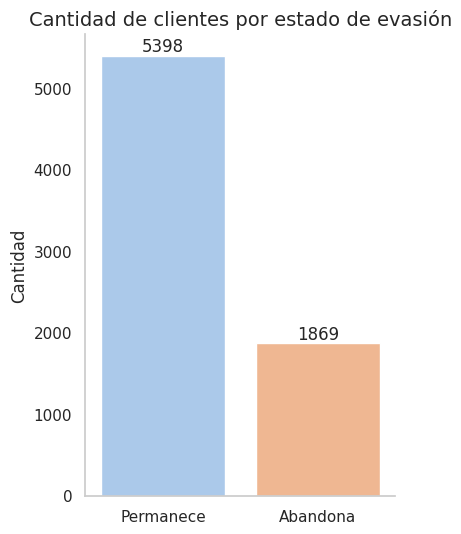

In [213]:
# Gráfico de barras
plt.figure(figsize=(4, 6))
sns.countplot(data=df_telecom, x='Evasión', hue='Evasión', palette='pastel', legend=False)
plt.title('Cantidad de clientes por estado de evasión', fontsize=14)
plt.ylabel('Cantidad')
plt.xlabel('')
plt.xticks([0, 1], ['Permanece', 'Abandona'])
# Eliminar borde superior y el de la derecha
sns.despine(top=True, right=True)
plt.grid(False)
for i, j in enumerate(df_telecom['Evasión'].value_counts()):
    plt.text(i, j, str(j), ha='center', va='bottom')
plt.savefig('dist_evasion.png', dpi=300, bbox_inches='tight')
plt.show()

In [214]:
# Conteo total de Evasión
conteo_evasion = df_telecom['Evasión'].value_counts()

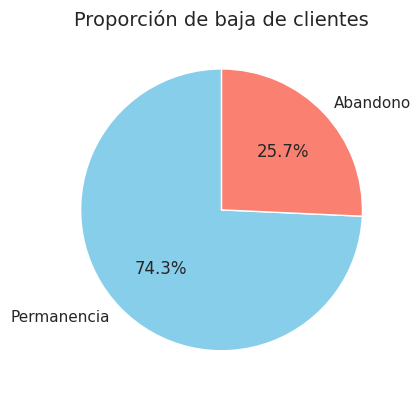

In [215]:
# Gráfico de torta
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 2)

plt.pie(conteo_evasion, labels=['Permanencia', 'Abandono'], autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Proporción de baja de clientes', fontsize=14)
plt.savefig('proporcion_evasion.png', dpi=300, bbox_inches='tight')
plt.show()

### **📈 1. Gráfico: Evasión según Permanencia**

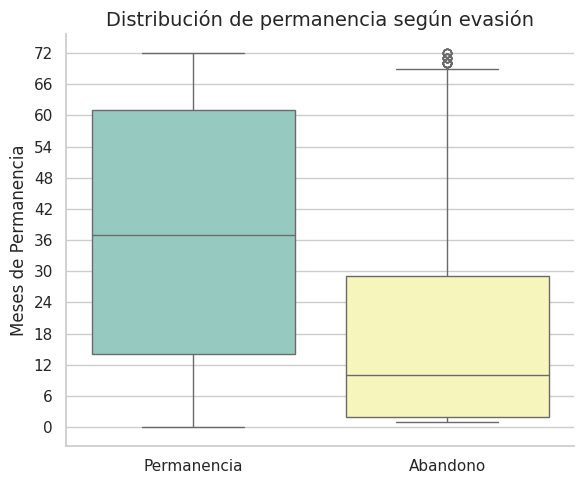

In [216]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df_telecom, x='Evasión', hue='Evasión', y='Permanencia', palette='Set3', legend=False)
plt.title('Distribución de permanencia según evasión', fontsize=14)
plt.xlabel('')
plt.ylabel('Meses de Permanencia')
plt.xticks([0, 1], ['Permanencia', 'Abandono'])
plt.yticks(range(0, 73, 6))
plt.tight_layout()
sns.despine(top=True, right=True)
plt.savefig('dist_permanencia.png', dpi=300, bbox_inches='tight')
plt.show()

## **Recuento de evasión por variables categóricas**

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como 'Género', 'Tipo Contrato', 'Método de Pago', 'Adulto Mayor', 'Dependiente' entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

### 🛠️ **Código generalizado para cualquier variable categórica**

In [217]:
def resumen_evasion_por_categoria(df, columna):
    resumen = df.groupby([columna, 'Evasión']).size().unstack(fill_value=0)
    resumen.columns = ['Permanencia', 'Abandono']
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=columna, hue='Evasión', palette='pastel')
    plt.title(f'Evasión según {columna.lower()}', fontsize=14)
    plt.xlabel(columna, fontsize=12)
    plt.ylabel('Cantidad de clientes')
    plt.xlabel('')
    plt.xticks(rotation=0)
    sns.despine(top=True, right=True)
    plt.grid(axis='x', linestyle='')
    plt.legend(title='Estado', labels=['Permanencia', 'Abandono'], loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.tight_layout()
    plt.savefig(f'evasion_{columna.lower()}.png', dpi=300, bbox_inches='tight')
    plt.show()


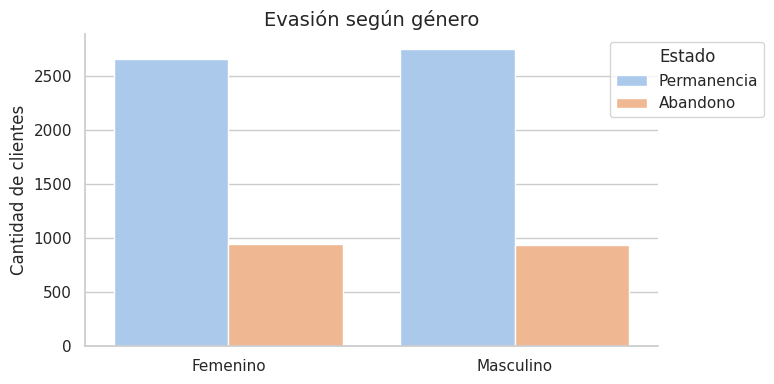

In [218]:
resumen_evasion_por_categoria(df_telecom, 'Género')

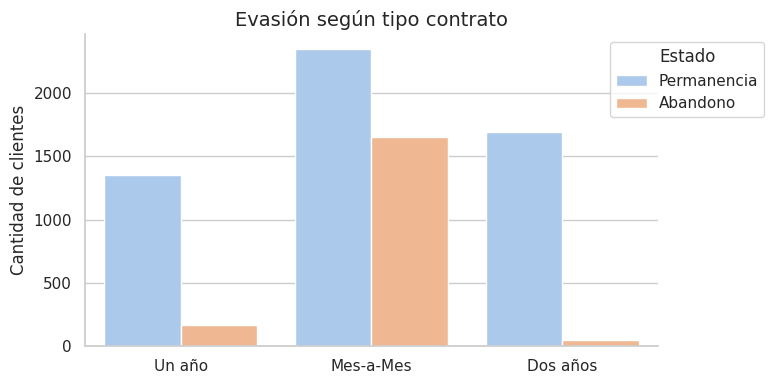

In [219]:
resumen_evasion_por_categoria(df_telecom, 'Tipo Contrato')

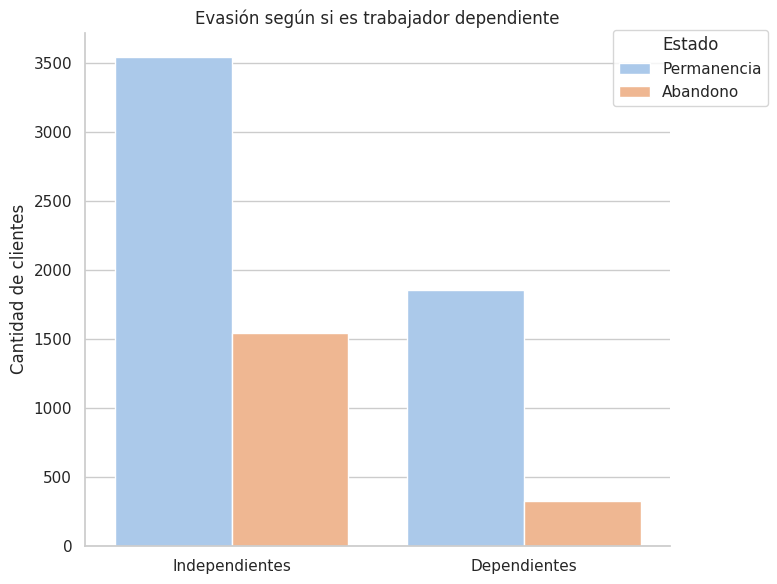

In [220]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_telecom, x='Dependiente', hue='Evasión', palette='pastel')
plt.title('Evasión según si es trabajador dependiente')
plt.ylabel('Cantidad de clientes')
plt.xlabel('')
plt.legend(labels=['Permanencia', 'Abandono'])
sns.despine(top=True, right=True)
plt.grid(axis='x', linestyle='')
plt.xticks([0, 1], ['Independientes', 'Dependientes'])
plt.legend(title='Estado', labels=['Permanencia', 'Abandono'], loc='upper right', bbox_to_anchor=(1.18, 1.02))
plt.tight_layout()
plt.savefig('evasion_trabajador_dependiente.png', dpi=300, bbox_inches='tight')

plt.show()

In [221]:
# Crear resumen de evasión por 'Método de Pago'
resumen_pago = df_telecom.groupby(['Método de Pago', 'Evasión']).size().unstack(fill_value=0)
resumen_pago.columns = ['Permanecen', 'Se evaden']
resumen_pago['Total'] = resumen_pago.sum(axis=1)
resumen_pago['% Evasión'] = resumen_pago['Se evaden'] / resumen_pago['Total'] * 100

In [222]:
# Ordenar por porcentaje de evasión
resumen_ordenado = resumen_pago.sort_values('% Evasión', ascending=False).reset_index()

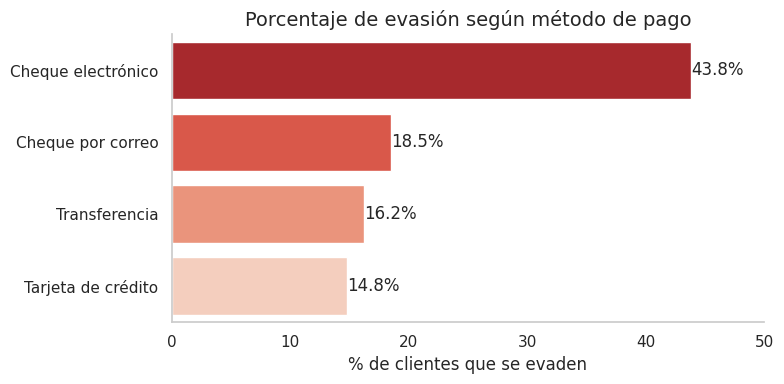

In [223]:
plt.figure(figsize=(8, 4))
sns.barplot(data=resumen_ordenado, y='Método de Pago', x='% Evasión', hue='Método de Pago', palette='Reds_r')
plt.title('Porcentaje de evasión según método de pago', fontsize=14)
plt.xlabel('% de clientes que se evaden')
plt.ylabel('')
plt.xlim(0, 50)
sns.despine(top=True, right=True)
plt.grid(axis='x', linestyle='')
for i, j in enumerate(resumen_ordenado['% Evasión']):
    plt.text(j, i, f'{j:.1f}%', ha='left', va='center')
plt.tight_layout()
plt.savefig('porcentaje_evasion_metodo_pago.png', dpi=300, bbox_inches='tight')
plt.show()

## **Conteo de evasión por variables numéricas**

Analizar variables numéricas como 'Cargo Total' en función de la evasión (Evasión) permite identificar:

- Si los clientes con cargos totales bajos tienden a cancelar.
- Qué perfiles económicos son más propensos a darse de baja.

### 📦 **Distribución de Permanencia según evasión**

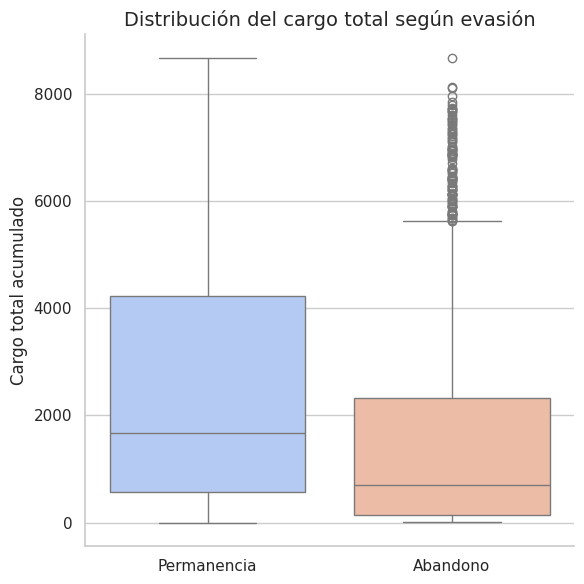

In [224]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df_telecom, x='Evasión', y='Cargo Total', hue='Evasión', palette='coolwarm', legend=False)
plt.title('Distribución del cargo total según evasión', fontsize=14)
plt.xlabel('')
plt.ylabel('Cargo total acumulado')
plt.xticks([0, 1], ['Permanencia', 'Abandono'])
sns.despine(top=True, right=True)
plt.tight_layout()
plt.savefig('dist_cargo_total.png', dpi=300, bbox_inches='tight')
plt.show()

# **📄 Informe final**

## 📘 **Introducción**

Telecom X, una empresa del sector de telecomunicaciones, enfrenta un desafío crítico: una **alta tasa de cancelación de servicios por parte de sus clientes**, también conocida como evasión o churn. Este fenómeno tiene un impacto directo en los ingresos recurrentes de la compañía, eleva los costos de adquisición de nuevos usuarios y reduce la estabilidad financiera a largo plazo.

Con el objetivo de **entender las causas del abandono de clientes**, se desarrolló un análisis exploratorio de datos utilizando Python y sus principales bibliotecas para ciencia de datos (pandas, numpy, matplotlib, seaborn). Este estudio busca responder preguntas como:

- ¿Qué características comparten los clientes que se evaden?
- ¿Existen patrones o comportamientos comunes en términos de facturación, permanencia o perfil del cliente?
- ¿Qué segmentos presentan mayor riesgo de cancelación?

Al identificar los factores asociados con la evasión, Telecom X podrá **diseñar estrategias proactivas de retención**, mejorar sus servicios y personalizar sus campañas de fidelización.

## 🧹 **Limpieza y Tratamiento de Datos**

Con el objetivo de preparar los datos para su análisis, se siguió un proceso de ETL (Extracción, Transformación y Carga) que incluyó la importación, exploración, normalización, limpieza y estandarización de los datos entregados por Telecom X.

### 🔽 **Extracción de datos**

Se importó el conjunto de datos en formato JSON desde una fuente en línea y se cargó en un DataFrame de pandas. Los datos contenían información estructurada en campos anidados tipo diccionario (JSON string) para atributos como datos del cliente, teléfono, servicios contratados y detalles de facturación.

**Primeros 5 registros del DataFrame**:

|index|customerID|Churn|customer|phone|internet|account|
|---|---|---|---|---|---|---|
|0|0002-ORFBO|No|\{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9\}|\{'PhoneService': 'Yes', 'MultipleLines': 'No'\}|\{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'\}|\{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': \{'Monthly': 65\.6, 'Total': '593\.3'\}\}|
|1|0003-MKNFE|No|\{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9\}|\{'PhoneService': 'Yes', 'MultipleLines': 'Yes'\}|\{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'\}|\{'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charges': \{'Monthly': 59\.9, 'Total': '542\.4'\}\}|
|2|0004-TLHLJ|Yes|\{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4\}|\{'PhoneService': 'Yes', 'MultipleLines': 'No'\}|\{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No'\}|\{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': \{'Monthly': 73\.9, 'Total': '280\.85'\}\}|
|3|0011-IGKFF|Yes|\{'gender': 'Male', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 13\}|\{'PhoneService': 'Yes', 'MultipleLines': 'No'\}|\{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'\}|\{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': \{'Monthly': 98\.0, 'Total': '1237\.85'\}\}|
|4|0013-EXCHZ|Yes|\{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 3\}|\{'PhoneService': 'Yes', 'MultipleLines': 'No'\}|\{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'\}|\{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': \{'Monthly': 83\.9, 'Total': '267\.4'\}\}|

### 🔄 **Transformación inicial**

Se identificó que varias columnas (`'customer', 'phone', 'internet', 'account'`) almacenaban información anidada. Estas columnas fueron normalizadas utilizando `pd.json_normalize()` dentro de un bucle, lo que permitió descomponerlas en múltiples columnas con datos atómicos.

Luego, se eliminaron las columnas originales anidadas y se conservaron únicamente las columnas desglosadas.

### ✅ **Verificación y corrección de inconsistencias**

Se realizó una auditoría de calidad de datos que reveló:

- La columna `'Charges.Total'` tenía valores vacíos y estaba en formato object, por lo que se convirtió a `float64` reemplazando valores nulos por 0.
- La columna `'SeniorCitizen'` se transformó correctamente a tipo booleano (True / False).
- Se descartaron columnas irrelevantes como `'customerID'`.

Además, se agregó una nueva variable `'Cargo Diario'`, estimada dividiendo la facturación mensual entre 30 días, para proporcionar un indicador más granular del comportamiento de pago.

### 🧪 **Estandarización de valores**

Varias columnas contenían respuestas tipo "Yes" / "No", las cuales se transformaron a valores booleanos (True / False). Esto facilitó el análisis numérico y la construcción de visualizaciones más precisas.

También se tradujeron al español los nombres de las columnas y los valores categóricos para mejorar la comprensión del análisis y facilitar su interpretación por parte del equipo de negocio.

### 🧾 **Resultado final**

El *DataFrame* final contiene **7267 registros** con columnas relevantes y limpias, listas para ser utilizadas en el análisis exploratorio. Las variables clave como `'Evasión'`, `'Permanencia'`, `'Cargo Total'`, `'Tipo Contrato'` y `'Método de Pago'` fueron validadas, transformadas y estandarizadas correctamente.

Además, el conjunto de datos fue exportado como archivo `.csv` bajo el nombre `Datos_TelecomX.csv`, listo para su uso en procesos posteriores.



**Primeros 5 registros del DataFrame Final**:

|index|Evasión|Género|Adulto Mayor|Tiene Pareja|Dependiente|Permanencia|Servicio Telefónico|Líneas Múltiples|Servicio Internet|Seguridad en Línea|Respaldo en Linea|Protección Dispositivo|Soporte Técnico|Streaming de TV|Streaming de Películas|Tipo Contrato|Facturación Electronica|Método de Pago|Cargo Mensual|Cargo Total|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|0|false|Femenino|false|true|true|9|true|false|DSL|false|true|false|true|true|false|Un año|true|Cheque por correo|65\.6|593\.3|
|1|false|Masculino|false|false|false|9|true|true|DSL|false|false|false|false|false|true|Mes-a-Mes|false|Cheque por correo|59\.9|542\.4|
|2|true|Masculino|false|false|false|4|true|false|Fibra óptica|false|false|true|false|false|false|Mes-a-Mes|true|Cheque electrónico|73\.9|280\.85|
|3|true|Masculino|true|true|false|13|true|false|Fibra óptica|false|true|true|false|true|true|Mes-a-Mes|true|Cheque electrónico|98\.0|1237\.85|
|4|true|Femenino|true|true|false|3|true|false|Fibra óptica|false|false|false|true|true|false|Mes-a-Mes|true|Cheque por correo|83\.9|267\.4|

## 📊 **Análisis Exploratorio de Datos (EDA)**

Con el conjunto de datos limpio y estandarizado, se procedió a realizar un análisis exploratorio para comprender mejor los patrones de comportamiento de los clientes, especialmente en relación con la evasión del servicio. Se utilizaron visualizaciones para detectar tendencias, relaciones y características clave asociadas con los clientes que abandonan Telecom X.

### 📉 **Distribución general de evasión**

Se analizaron las proporciones generales de clientes que permanecen y los que se evaden.

- **Gráfico de barras**: muestra el número absoluto de clientes en cada categoría (Permanece vs Abandona).

<img src="https://drive.google.com/uc?id=1KzJ45XEXdqrTqbMjsDbDaSIsen38l8TP&" alt="Descripción de la imagen" width="400">

- **Gráfico de torta**: permite observar la proporción relativa de evasión.

<img src="https://drive.google.com/uc?id=1tkup42KP9QrwmLVvuWxtx_eGBRZYsiCZ" alt="Descripción de la imagen" width="400">

**Resultado**: Aproximadamente 25.7% de los clientes han abandonado el servicio, mientras que 74.3% se mantienen activos.

### 📦 **Evasión según permanencia**

Se utilizó un boxplot para evaluar la relación entre el tiempo de permanencia (en meses) y la evasión.

<img src="https://drive.google.com/uc?id=1ccmj5KHrV9QMoBvEH2w14vQKVyeE2A7W" alt="Descripción de la imagen" width="500">

**Se observó que**:

- Los clientes que abandonan tienden a tener menor tiempo de permanencia.
- Los clientes con contratos más prolongados tienden a mantenerse, lo que sugiere una correlación entre fidelidad y permanencia.

### 🧑‍🤝‍🧑 **Evasión según variables categóricas**

Se analizaron diversas variables categóricas para identificar patrones en la evasión. Se utilizaron gráficos de barras agrupadas para comparar las tasas de evasión en distintas categorías:

**Género**: No se evidencian diferencias significativas entre hombres y mujeres.

<img src="https://drive.google.com/uc?id=12sE2RH6eYO9n_twPPrdCIPy71rsOzbPB" alt="Descripción de la imagen" width="700">

**Tipo de contrato**: Los clientes con contrato mensual (Mes-a-Mes) presentan una tasa mucho mayor de evasión, mientras que los contratos de uno o dos años se asocian con una mayor retención.

<img src="https://drive.google.com/uc?id=1Hr8UcbAmzj94gjrmFV-b5325iHeMKcO0" alt="Descripción de la imagen" width="700">

**Dependencia laboral**: Los clientes independientes (sin dependientes) tienen una mayor probabilidad de evasión.

<img src="https://drive.google.com/uc?id=1JfSbEoz-fyHGeA-8n1IglAIIRa6NtiKq" alt="Descripción de la imagen" width="700">

### 💳 **Evasión según método de pago**

Dado que hay varias categorías de métodos de pago, se utilizó un gráfico de barras horizontales para observar mejor la variación:

<img src="https://drive.google.com/uc?id=10Hrv6h9ogFwVl6p2KILJWqzYVXz51HcW" alt="Descripción de la imagen" width="800">

- Los clientes que utilizan cheque electrónico tienen la mayor tasa de evasión.
- En contraste, quienes usan tarjeta de crédito automática presentan una menor probabilidad de abandonar el servicio.



Esta diferencia sugiere que los métodos de pago automáticos podrían estar relacionados con una mayor fidelidad.

### 💵 **Evasión según variables numéricas**

Finalmente, se exploró la variable Cargo Total mediante un boxplot:

<img src="https://drive.google.com/uc?id=1IMJqPAldJt6A4ilHtNdKnxMaSVVsGx-3" alt="Descripción de la imagen" width="600">

Los clientes que abandonan el servicio tienen, en general, menores cargos acumulados, lo que concuerda con la observación previa de menor tiempo de permanencia.

## ✅ Conclusiones e Insights

El análisis realizado sobre el comportamiento de los clientes de Telecom X reveló hallazgos clave que explican parte del problema de evasión. A continuación, se destacan los principales:

1. **Alta tasa de evasión**: Aproximadamente **1 de cada 4 clientes** abandona el servicio, lo que representa un desafío significativo para la empresa.
1. **Menor permanencia, mayor evasión**: Los clientes que cancelan tienden a haber estado suscritos por menos tiempo. Existe una clara correlación entre **baja permanencia y alta probabilidad de evasión**.
1. **Contratos mensuales están más expuestos**: Los clientes con contratos de tipo "**Mes-a-Mes**" presentan una **tasa de evasión sustancialmente mayor**, comparado con aquellos con contratos anuales o bianuales.
1. **Métodos de pago asociados a abandono**: Se identificó que clientes que utilizan **cheque electrónico o por correo** tienen una tasa más alta de evasión. En contraste, los métodos automáticos (tarjeta o transferencia) están asociados con mayor retención.
1. **Perfil demográfico y servicios**: No se encontraron diferencias notables en evasión por género, pero sí por **situación familiar**: quienes no **tienen pareja o dependientes** tienden a cancelar con mayor frecuencia. También se observó que ciertos servicios opcionales como **soporte técnico** o **respaldo en línea** pueden influir positivamente en la retención.

## 🎯 **Recomendaciones Estratégicas**

Basado en los patrones detectados en los datos, se proponen las siguientes acciones para reducir la evasión de clientes:

1. **Fomentar contratos de largo plazo**
    - Implementar incentivos o beneficios especiales para quienes opten por contratos anuales o bianuales, ya que estos están claramente asociados con menor evasión.
1. **Promover métodos de pago automáticos**
    - Otorgar descuentos o recompensas a clientes que se cambien a **tarjeta de crédito** o **transferencia automática**.
    - Simplificar el proceso de migración de método de pago.
1. **Detectar clientes en riesgo temprano**
    - Crear alertas para clientes con menos de 6 meses de permanencia o con cargos bajos acumulados, ya que estos perfiles son más propensos a abandonar.
1. **Optimizar servicios complementarios**
    - Aumentar la visibilidad y valor percibido de servicios como **respaldo en línea**, **soporte técnico** y **protección de dispositivos**, que se relacionan con mayor retención.
1. **Segmentar y personalizar la comunicación**
    - Usar los hallazgos del perfil de evasión para diseñar campañas dirigidas según tipo de cliente, contrato y método de pago.
1. **Explorar encuestas de salida**
    - Implementar encuestas automatizadas a clientes que cancelan para identificar razones específicas y validar los patrones observados en los datos.

# 📌 **¡Extra! Análisis de correlación entre variables**

## 📊 **1. Matriz de correlación**

Calculamos la matriz de correlación de las variables numéricas y booleanas convertidas a `int`, ya que `pandas.DataFrame.corr()` funciona únicamente con valores numéricos.

In [225]:
# Convertir columnas booleanas a int para calcular la correlación
df_corr = df_telecom.copy()
df_corr = df_corr.astype({col: int for col in df_corr.select_dtypes('bool').columns})

In [226]:
# Calcular la matriz de correlación
correlaciones = df_corr.corr(numeric_only=True)

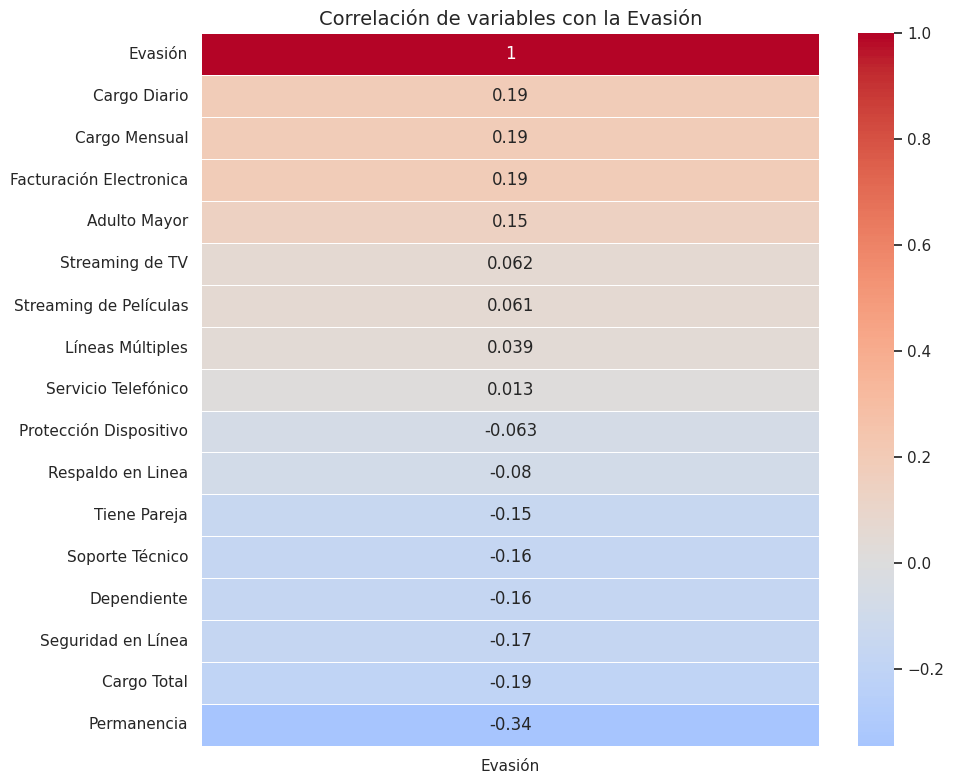

In [227]:
# Visualizar correlación con 'Evasión'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones[['Evasión']].sort_values(by='Evasión', ascending=False),
            annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlación de variables con la Evasión', fontsize=14)
plt.tight_layout()
plt.show()

## 🔍 **Insights observados**

- `Tipo Contrato (Mes-a-Mes)` y `Método de Pago (Cheque electrónico)` tienen fuerte correlación positiva con la evasión.
- `Permanencia`, `Cargo Total` y `Cargo Diario` muestran correlación negativa, indicando que clientes con más tiempo o mayor inversión suelen permanecer más.
- Servicios como `Soporte Técnico`, `Protección Dispositivo` y `Seguridad en Línea` tienen ligera correlación negativa, sugiriendo una leve relación entre acceso a estos servicios y menor evasión.

## 🔢 **2. Relación entre número de servicios contratados y evasión**

Calculamos una nueva variable: el número de servicios digitales contratados por cliente.

In [228]:
# Lista de servicios booleanos
servicios = [
    'Servicio Telefónico', 'Líneas Múltiples', 'Seguridad en Línea',
    'Respaldo en Linea', 'Protección Dispositivo', 'Soporte Técnico',
    'Streaming de TV', 'Streaming de Películas'
]

In [229]:
# Crear columna con el conteo de servicios contratados
df_telecom['Servicios Contratados'] = df_telecom[servicios].sum(axis=1)

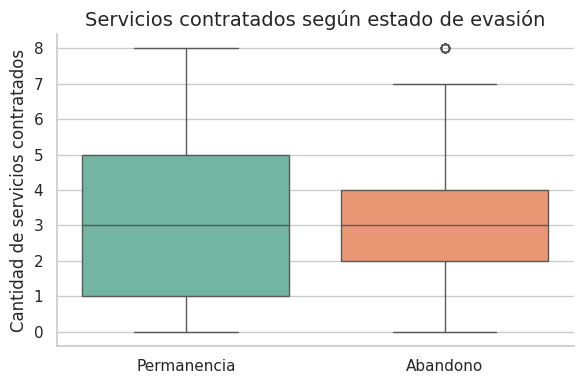

In [230]:
# Boxplot de servicios vs evasión
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_telecom, x='Evasión', y='Servicios Contratados', hue='Evasión', palette='Set2', legend=False)
plt.title('Servicios contratados según estado de evasión', fontsize=14)
plt.xlabel('')
plt.ylabel('Cantidad de servicios contratados')
plt.xticks([0, 1], ['Permanencia', 'Abandono'])
sns.despine()
plt.tight_layout()
plt.show()

## ✅ **Conclusión del análisis de correlación**

- Cuantos menos servicios tiene un cliente, **es más probable que abandone la compañía**.
- Las **cuentas diarias más bajas** también muestran mayor relación con evasión.
- Este tipo de análisis es especialmente útil como **base para modelos de machine learning**, ya que permite seleccionar las variables más influyentes en la predicción de abandono.